# Appendix, Algorithm contracts and does not converge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from a.lib.dataloader import DataLoader
from a.lib.tools import dist, lpf

In [2]:
# Set figure aethetics
sns.set_context("notebook")
sns.set_style("ticks")
fs = 14

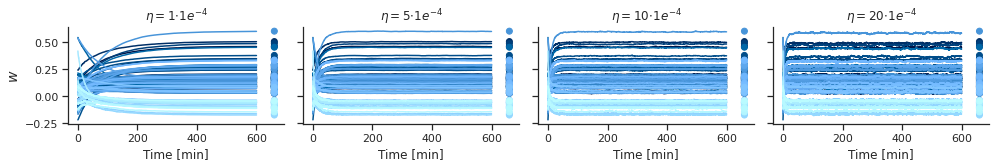

In [3]:
# Load data and plot
sns.set_palette(['#001245', '#001447', '#001649', '#00184b', '#001a4d', '#001c50', '#001e52', '#002055',
                 '#002257', '#00245a', '#00265c', '#00285f', '#002b62', '#002d64', '#002f67', '#003169',
                 '#00336c', '#00356e', '#003771', '#003973', '#003c76', '#003e78', '#00407b', '#00427d',
                 '#004480', '#004783', '#004985', '#004b88', '#004d8a', '#00508d', '#00528f', '#005492',
                 '#005795', '#005997', '#005b9a', '#005e9c', '#00609f', '#0062a2', '#0065a4', '#0067a7',
                 '#0069a9', '#006cac', '#006eaf', '#0070b1', '#0773b4', '#1075b6', '#1677b9', '#1c79bb',
                 '#217bbd', '#257ec0', '#2980c2', '#2d82c5', '#3184c7', '#3487ca', '#3889cc', '#3b8bcf',
                 '#3e8dd1', '#4190d4', '#4492d6', '#4794d9', '#4a96db', '#4d99de', '#509be0', '#539de3',
                 '#56a0e5', '#59a2e8', '#5ba4ea', '#5ea7ed', '#61a9ef', '#64abf2', '#66aef4', '#69b0f7',
                 '#6cb3f9', '#6eb5fc', '#71b7fe', '#74baff', '#77bdff', '#7abfff', '#7dc2ff', '#80c5ff',
                 '#83c8ff', '#86caff', '#89cdff', '#8cd0ff', '#8fd2ff', '#92d5ff', '#94d8ff', '#97dbff',
                 '#9addff', '#9de0ff', '#a0e3ff', '#a3e5ff', '#a6e8ff', '#a8ebff', '#abeeff', '#aef0ff',
                 '#b1f3ff', '#b4f6ff', '#b7f9ff', '#bafbff'])
colors = sns.color_palette()

k = 0
i = 0

log_interval = 600

fig, axs = plt.subplots(1, 4, figsize=(14, 2.5), sharey=True)

for j, lr in enumerate([1., 5., 10., 20.]):
    data = DataLoader("./a/results/", "fluctuations_" + str(lr)).merge()
    
    experiment_length = (log_interval * data["ws"].shape[2]) / 1000 / 60
    x = np.linspace(0., experiment_length, data["tau_s"][k].shape[0])
    
    axs[j].plot(x[::10], data["ws"][k][:, ::10].T, zorder=1)
    scatter_x = experiment_length * 1.1
    axs[j].scatter([scatter_x] * 100, data["ws_target"][i], marker="o", color=colors, zorder=4)
    axs[j].set_title("$\eta = $" + str(int(lr))+ "$\cdot 1e^{-4}$")
    
axs[0].set_ylabel("$w$", fontsize=fs)

for i in range(4):
    sns.despine(ax=axs[i])
    axs[i].set_xlabel("Time [min]")
    fig.tight_layout()
    
fig.savefig("appendix-fluctuations.pdf", pad_inches=0.)